## Pytorch Tutorial for Deep Learning Lovers
---
[링크](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/data)

### Basics of Pytorch 진행

In [6]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
from torch.autograd import Variable
print(os.listdir('D:/chchdata/dataset/digit_recognizer'))

['sample_submission.csv', 'test.csv', 'train.csv']


---
### Linear Regression


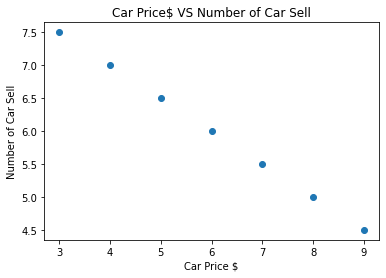

In [8]:
# 이전 자동차 판매 가격을 수집

# 자동차 가격을 정의
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# 자동차 판매 대수를 정의
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1, 1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# 데이터를 시각화
import matplotlib.pyplot as plt
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel('Car Price $')
plt.ylabel('Number of Car Sell')
plt.title('Car Price$ VS Number of Car Sell')
plt.show()

epoch 0, loss 27.04350471496582
epoch 50, loss 5.0174455642700195
epoch 100, loss 3.390497922897339
epoch 150, loss 2.2911007404327393
epoch 200, loss 1.5481913089752197
epoch 250, loss 1.0461781024932861
epoch 300, loss 0.7069472670555115
epoch 350, loss 0.4777139127254486
epoch 400, loss 0.32281187176704407
epoch 450, loss 0.21813760697841644
epoch 500, loss 0.1474047750234604
epoch 550, loss 0.09960733354091644
epoch 600, loss 0.06730847805738449
epoch 650, loss 0.045483313500881195
epoch 700, loss 0.030734781175851822
epoch 750, loss 0.020768582820892334
epoch 800, loss 0.014034160412847996
epoch 850, loss 0.009483376517891884
epoch 900, loss 0.0064083486795425415
epoch 950, loss 0.004330442752689123
epoch 1000, loss 0.0029262234456837177


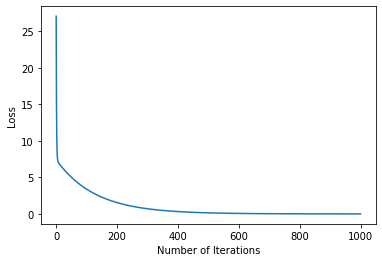

In [11]:
# Linear Regression with Pytorch

# 라이브러리 불러오기
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

# 클래스 생성
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # 상속 함수. nn.Module을 상속 받아서 모든 기능을 사용할 수 있게 하는 클래스
        super(LinearRegression, self).__init__()
        # linear function
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim) # 인풋, 아웃풋 데이터 사이즈 : 1

# MSE
mse = nn.MSELoss()

# Optimization (파라미터를 찾아서 에러를 최소화)
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 학습 모델
loss_list = [] 
iteration_number = 1001
for iteration in range(iteration_number):

    # optimization
    optimizer.zero_grad()

    # 순전파
    results = model(car_price_tensor)

    # loss 계산
    loss = mse(results, number_of_car_sell_tensor)

    # 역전파
    loss.backward()

    # 파라미터 업데이트
    optimizer.step()

    # 로스 기록
    loss_list.append(loss.data)

    # 로스 출력
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))
    
plt.plot(range(iteration_number), loss_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

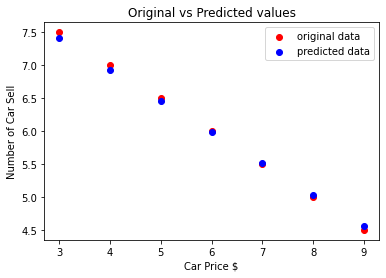

In [12]:
# 자동차 가격을 예측

predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = 'original data', color = 'red')
plt.scatter(car_prices_array, predicted, label = 'predicted data', color = 'blue')

# 예측한 자동차의 가격이 10달러라면 판매 대수를 예측 할 수 있다.
plt.legend()
plt.xlabel('Car Price $')
plt.ylabel('Number of Car Sell')
plt.title('Original vs Predicted values')
plt.show()

---
### Logistic Regression